<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.


In [7]:
!pip install yfinance==0.2.38
!pip install pandas==2.2.2
!pip install nbformat

In [2]:
!pip install yfinance
!pip install bs4
!pip install nbformat

In [8]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [4]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [6]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard. 
> **Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**


## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [9]:
tesla = yf.Ticker("TSLA")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [10]:
tesla_data = tesla.history(period="max")

**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [11]:
tesla_data.reset_index(inplace=True)


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [12]:
import requests
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)

In [6]:
response.status_code

200

In [14]:
html_data = response.text

In [8]:
html_data

'\n<!DOCTYPE html>\n<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->\n<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->\n<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->\n<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->\n    <head>\n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n\t\t<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />\n\t\t<title>Tesla Revenue 2010-2022 | TSLA | MacroTrends</title>\n\t\t<meta name="description" content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2022. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    \n\t\t\t\t\n\t\t\t\t&lt;ul style=\'margin-top:10p

Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`. Make sure to use the `html_data` with the content parameter as follow `html_data.content` .


In [15]:
soup = BeautifulSoup(html_data,'html.parser')

In [12]:
soup


<!DOCTYPE html>

<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<link href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" rel="canonical"/>
<title>Tesla Revenue 2010-2022 | TSLA | MacroTrends</title>
<meta content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2022. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    
				
				&lt;ul style='margin-top:10px;'&gt;
				&lt;li&gt;Tesla revenue for the quarter ending September 30,

Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Step-by-step instructions</summary>

```

Here are the step-by-step instructions:

1. Find All Tables: Start by searching for all HTML tables on a webpage using `soup.find_all('table')`.
2. Identify the Relevant Table: then loops through each table. If a table contains the text “Tesla Quarterly Revenue,”, select that table.
3. Initialize a DataFrame: Create an empty Pandas DataFrame called `tesla_revenue` with columns “Date” and “Revenue.”
4. Loop Through Rows: For each row in the relevant table, extract the data from the first and second columns (date and revenue).
5. Clean Revenue Data: Remove dollar signs and commas from the revenue value.
6. Add Rows to DataFrame: Create a new row in the DataFrame with the extracted date and cleaned revenue values.
7. Repeat for All Rows: Continue this process for all rows in the table.

```
</details>


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
> Note: Instead of using the deprecated pd.append() method, consider using pd.concat([df, pd.DataFrame], ignore_index=True).
```

</details>


In [29]:
all_table=soup.find_all('table')
all_table

[<table class="historical_data_table table">
 <thead>
 <tr>
 <th colspan="2" style="text-align:center">Tesla Annual Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>
 </tr>
 </thead>
 <tbody>
 <tr>
 <td style="text-align:center">2021</td>
 <td style="text-align:center">$53,823</td>
 </tr>
 <tr>
 <td style="text-align:center">2020</td>
 <td style="text-align:center">$31,536</td>
 </tr>
 <tr>
 <td style="text-align:center">2019</td>
 <td style="text-align:center">$24,578</td>
 </tr>
 <tr>
 <td style="text-align:center">2018</td>
 <td style="text-align:center">$21,461</td>
 </tr>
 <tr>
 <td style="text-align:center">2017</td>
 <td style="text-align:center">$11,759</td>
 </tr>
 <tr>
 <td style="text-align:center">2016</td>
 <td style="text-align:center">$7,000</td>
 </tr>
 <tr>
 <td style="text-align:center">2015</td>
 <td style="text-align:center">$4,046</td>
 </tr>
 <tr>
 <td style="text-align:center">2014</td>
 <td style="text-align:center">$3,198</td>
 </tr>
 <tr

In [32]:
soup.find_all("tbody")[1]

<tbody>
<tr>
<td style="text-align:center">2022-09-30</td>
<td style="text-align:center">$21,454</td>
</tr>
<tr>
<td style="text-align:center">2022-06-30</td>
<td style="text-align:center">$16,934</td>
</tr>
<tr>
<td style="text-align:center">2022-03-31</td>
<td style="text-align:center">$18,756</td>
</tr>
<tr>
<td style="text-align:center">2021-12-31</td>
<td style="text-align:center">$17,719</td>
</tr>
<tr>
<td style="text-align:center">2021-09-30</td>
<td style="text-align:center">$13,757</td>
</tr>
<tr>
<td style="text-align:center">2021-06-30</td>
<td style="text-align:center">$11,958</td>
</tr>
<tr>
<td style="text-align:center">2021-03-31</td>
<td style="text-align:center">$10,389</td>
</tr>
<tr>
<td style="text-align:center">2020-12-31</td>
<td style="text-align:center">$10,744</td>
</tr>
<tr>
<td style="text-align:center">2020-09-30</td>
<td style="text-align:center">$8,771</td>
</tr>
<tr>
<td style="text-align:center">2020-06-30</td>
<td style="text-align:center">$6,036</td>


In [24]:
for index,table in enumerate(all_table):
    if ("Tesla Quarterly Revenue" in str(all_table)):
        all_table_index = index
print(all_table_index)

5


In [33]:
import pandas as pd

# Step 1: Download the webpage using pandas' read_html() function
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Step 2: Extract all tables from the webpage into a list of DataFrames
tables = pd.read_html(url)

# Step 3: Find the table with Tesla Quarterly Revenue
for table in tables:
    if "Tesla Quarterly Revenue" in table.to_string():
        tesla_revenue = table  # Store the relevant table in a DataFrame
        break

# Step 4: Rename the columns to 'Date' and 'Revenue' if necessary
tesla_revenue.columns = ['Date', 'Revenue']

# Step 5: Display the DataFrame
print(tesla_revenue)

          Date  Revenue
0   2022-09-30  $21,454
1   2022-06-30  $16,934
2   2022-03-31  $18,756
3   2021-12-31  $17,719
4   2021-09-30  $13,757
5   2021-06-30  $11,958
6   2021-03-31  $10,389
7   2020-12-31  $10,744
8   2020-09-30   $8,771
9   2020-06-30   $6,036
10  2020-03-31   $5,985
11  2019-12-31   $7,384
12  2019-09-30   $6,303
13  2019-06-30   $6,350
14  2019-03-31   $4,541
15  2018-12-31   $7,226
16  2018-09-30   $6,824
17  2018-06-30   $4,002
18  2018-03-31   $3,409
19  2017-12-31   $3,288
20  2017-09-30   $2,985
21  2017-06-30   $2,790
22  2017-03-31   $2,696
23  2016-12-31   $2,285
24  2016-09-30   $2,298
25  2016-06-30   $1,270
26  2016-03-31   $1,147
27  2015-12-31   $1,214
28  2015-09-30     $937
29  2015-06-30     $955
30  2015-03-31     $940
31  2014-12-31     $957
32  2014-09-30     $852
33  2014-06-30     $769
34  2014-03-31     $621
35  2013-12-31     $615
36  2013-09-30     $431
37  2013-06-30     $405
38  2013-03-31     $562
39  2012-12-31     $306
40  2012-09-30  

Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [37]:
#tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"", regex=True)
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace(r',|\$', '', regex=True)


Execute the following lines to remove an null or empty strings in the Revenue column.


In [38]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [39]:
tesla_revenue.tail(5)

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [26]:
gme = yf.Ticker("GME")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [42]:
gme_data = gme.history(period="max")
gme_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578048,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0
...,...,...,...,...,...,...,...
2024-10-07 00:00:00-04:00,21.350000,21.530001,20.809999,20.900000,5988000,0.0,0.0
2024-10-08 00:00:00-04:00,20.900000,21.270000,20.530001,20.709999,4840500,0.0,0.0
2024-10-09 00:00:00-04:00,20.500000,20.740000,20.299999,20.500000,3914000,0.0,0.0


**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [43]:
gme_data.reset_index(inplace=True)

In [44]:
gme_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578048,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


In [53]:
import requests
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)


In [54]:
html_data_2 = response.text

Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [55]:
soup = BeautifulSoup(html_data_2,"html.parser")

Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


> **Note: Use the method similar to what you did in question 2.**  


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [35]:
import pandas as pd

# Step 1: Download the webpage and extract tables
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
tables = pd.read_html(url)

# Step 2: Print the number of tables found
print(f"Number of tables found: {len(tables)}")

# Step 3: Check for GameStop revenue in each table
gme_revenue = None  # Initialize the DataFrame

for index, table in enumerate(tables):
    # Check if "GameStop" is present in the table text
    if "GameStop" in table.to_string():
        gme_revenue = table  # Store the relevant table
        print(f"'GameStop' found in table index {index}.")
        break

# Step 4: Check if the table was found
if gme_revenue is not None:
    # Rename the columns to 'Date' and 'Revenue'
    gme_revenue.columns = ['Date', 'Revenue']

    # Step 5: Handle missing or invalid values in the 'Revenue' column
    gme_revenue = gme_revenue.dropna(subset=['Revenue'])  # Remove rows with missing Revenue

    # Step 6: Clean the 'Revenue' column by removing commas and dollar signs
    gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace(r',|\$', '', regex=True)

    # Step 7: Convert the 'Revenue' column to numeric
    gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'])

    # Display the cleaned DataFrame
    print(gme_revenue)
else:
    print("GameStop Revenue table not found.")


Number of tables found: 6
'GameStop' found in table index 0.
    Date  Revenue
0   2020     6466
1   2019     8285
2   2018     8547
3   2017     7965
4   2016     9364
5   2015     9296
6   2014     9040
7   2013     8887
8   2012     9551
9   2011     9474
10  2010     9078
11  2009     8806
12  2008     7094
13  2007     5319
14  2006     3092
15  2005     1843


In [37]:
# Assuming gme_revenue is already defined and contains the GameStop revenue data
gme_revenue.tail()


,Date,Revenue
11,2009,8806
12,2008,7094
13,2007,5319
14,2006,3092
15,2005,1843


In [2]:
import pandas as pd

# Step 1: Download the webpage and extract tables
url = " https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
tables = pd.read_html(url)

# Step 2: Extract and print the table names
table_names = []

for index, table in enumerate(tables):
    # Check if the table has a header and extract it as the name
    if table.columns is not None and not table.columns.empty:
        table_name = table.columns[0]  # Get the first column as the name
        table_names.append(f"Table {index}: {table_name}")
    else:
        table_names.append(f"Table {index}: No header")

# Step 3: Print the extracted table names
print("Extracted Table Names:")
for name in table_names:
    print(name)


Extracted Table Names:
Table 0: GameStop Annual Revenue (Millions of US $)
Table 1: GameStop Quarterly Revenue (Millions of US $)
Table 2: Sector
Table 3: Stock Name
Table 4: Link Preview
Table 5: Link Preview


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

```
    
</details>


                                Open       High        Low      Close  \
Date                                                                    
2020-01-02 00:00:00-05:00  28.299999  28.713333  28.114000  28.684000   
2020-01-03 00:00:00-05:00  29.366667  30.266666  29.128000  29.534000   
2020-01-06 00:00:00-05:00  29.364668  30.104000  29.333332  30.102667   
2020-01-07 00:00:00-05:00  30.760000  31.441999  30.224001  31.270666   
2020-01-08 00:00:00-05:00  31.580000  33.232666  31.215334  32.809334   

                              Volume  Dividends  Stock Splits  
Date                                                           
2020-01-02 00:00:00-05:00  142981500        0.0           0.0  
2020-01-03 00:00:00-05:00  266677500        0.0           0.0  
2020-01-06 00:00:00-05:00  151995000        0.0           0.0  
2020-01-07 00:00:00-05:00  268231500        0.0           0.0  
2020-01-08 00:00:00-05:00  467164500        0.0           0.0  


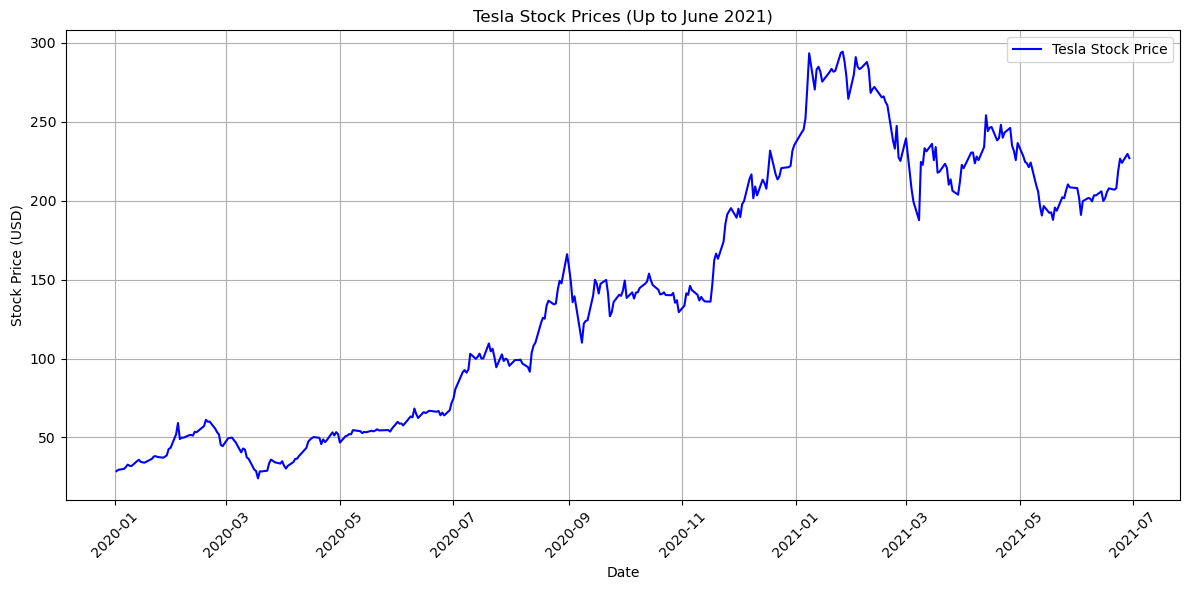

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Step 1: Download Tesla stock data using yfinance
tesla = yf.Ticker("TSLA")

# Step 2: Get the historical stock data
tesla_stock_data = tesla.history(start='2020-01-01', end='2021-06-30')

# Step 2: Check the data (optional)
print(tesla_stock_data.head())  # Display the first few rows of the DataFrame

# Step 3: Define the make_graph function
def make_graph(data, title):
    plt.figure(figsize=(12, 6))  # Set the figure size
    plt.plot(data.index, data['Close'], label='Tesla Stock Price', color='blue')  # Plot the 'Close' price
    plt.title(title)  # Add title
    plt.xlabel('Date')  # X-axis label
    plt.ylabel('Stock Price (USD)')  # Y-axis label
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.legend()  # Show legend
    plt.grid()  # Show grid
    plt.tight_layout()  # Adjust layout to prevent clipping
    plt.show()  # Display the graph

# Step 4: Call the make_graph function to graph the Tesla stock data up to June 2021
make_graph(tesla_stock_data, 'Tesla Stock Prices (Up to June 2021)')


## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`

```
    
</details>


                             Open    High     Low   Close    Volume  \
Date                                                                  
2020-01-02 00:00:00-05:00  1.5350  1.6175  1.5175  1.5775  17814400   
2020-01-03 00:00:00-05:00  1.5525  1.5625  1.4600  1.4700  14175600   
2020-01-06 00:00:00-05:00  1.4500  1.4775  1.4000  1.4625  13579200   
2020-01-07 00:00:00-05:00  1.4425  1.4575  1.3600  1.3800  20912000   
2020-01-08 00:00:00-05:00  1.3725  1.4625  1.3525  1.4300  22517600   

                           Dividends  Stock Splits  
Date                                                
2020-01-02 00:00:00-05:00        0.0           0.0  
2020-01-03 00:00:00-05:00        0.0           0.0  
2020-01-06 00:00:00-05:00        0.0           0.0  
2020-01-07 00:00:00-05:00        0.0           0.0  
2020-01-08 00:00:00-05:00        0.0           0.0  


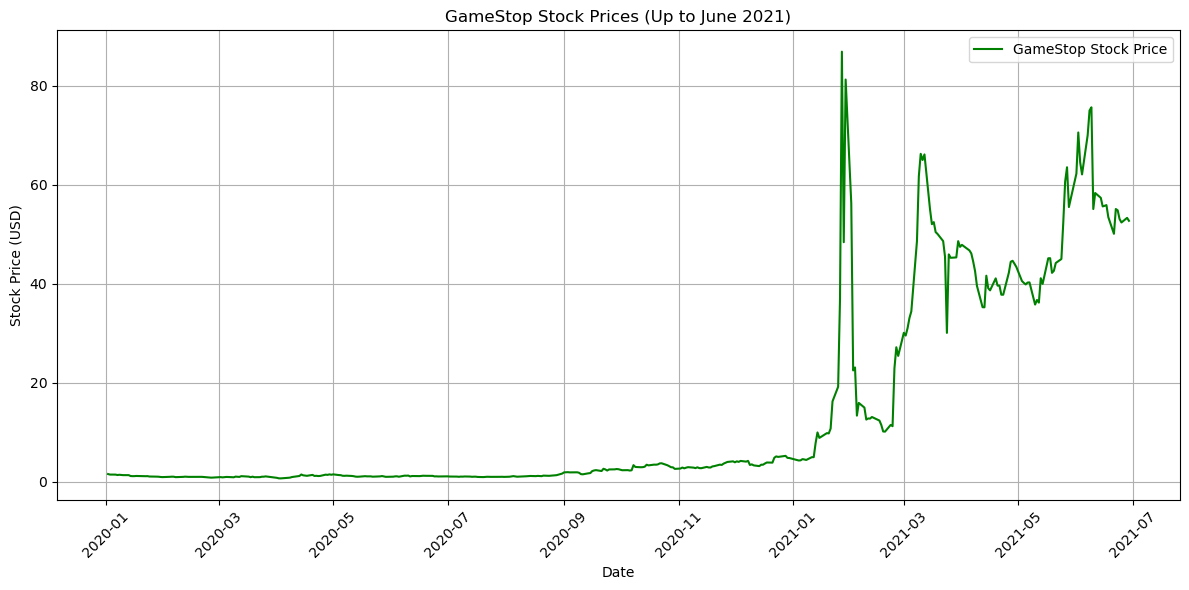

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Step 1: Create a Ticker object for GameStop
gme = yf.Ticker("GME")

# Step 2: Get the historical stock data for GameStop
gme_data = gme.history(start='2020-01-01', end='2021-06-30')

# Step 3: Check the data (optional)
print(gme_data.head())  # Display the first few rows of the DataFrame

# Step 4: Define the make_graph function
def make_graph(data, revenue, title):
    plt.figure(figsize=(12, 6))  # Set the figure size
    plt.plot(data.index, data['Close'], label='GameStop Stock Price', color='green')  # Plot the 'Close' price
    plt.title(f'{title} Stock Prices (Up to June 2021)')  # Add title
    plt.xlabel('Date')  # X-axis label
    plt.ylabel('Stock Price (USD)')  # Y-axis label
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.legend()  # Show legend
    plt.grid()  # Show grid
    plt.tight_layout()  # Adjust layout to prevent clipping
    plt.show()  # Display the graph

# Step 5: Call the make_graph function to graph the GameStop stock data
make_graph(gme_data, None, 'GameStop')  # Pass None for revenue if not needed


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

```toggle ## Change Log
```
```toggle | Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
```
```toggle | ----------------- | ------- | ------------- | ------------------------- |
```
```toggle | 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
```
```toggle | 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
```
```toggle | 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |
```
